In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv('/content/BMW sales data (2010-2024).csv', sep=';')

# Load data mentah
df_raw = pd.read_csv('/content/BMW sales data (2010-2024).csv', sep=';')

In [ ]:
# Data understanding
df.shape #melihat ukuran baris dan kolom
df.head(5) #melihat 5 baris pertama
df.describe (include='all') #ringkasan statistik


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,32.471800,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,10.090784,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,15.000000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,24.000000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,32.000000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,41.000000,150630.250000,97628.250000,7537.250000,NaN


In [ ]:
# Cek Cleaning data
print("Jumlah baris awal:" , len (df_raw))
print("Jumlah baris sesudah di cleaning :" , len(df))

Jumlah baris awal: 50000
Jumlah baris sesudah di cleaning : 50000


In [ ]:
# Cek duplikat
df.duplicated().sum()

np.int64(0)

In [ ]:
# Cek missing values
df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


In [ ]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Model                 50000 non-null  object
 1   Year                  50000 non-null  int64 
 2   Region                50000 non-null  object
 3   Color                 50000 non-null  object
 4   Fuel_Type             50000 non-null  object
 5   Transmission          50000 non-null  object
 6   Engine_Size_L         50000 non-null  int64 
 7   Mileage_KM            50000 non-null  int64 
 8   Price_USD             50000 non-null  int64 
 9   Sales_Volume          50000 non-null  int64 
 10  Sales_Classification  50000 non-null  object
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


In [ ]:
# Mengubah tipe data kolom Engine_Size_L
df['Engine_Size_L'] = df['Engine_Size_L'].astype(float)

**EXPLORATORY DATA ANALYSIS**


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Model,50000,11,7 Series,4666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,50000.0,NaN,NaN,NaN,2017.0157,4.324459,2010.0,2013.0,2017.0,2021.0,2024.0
Region,50000,6,Asia,8454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,50000,6,Red,8463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,50000,4,Hybrid,12716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,50000,2,Manual,25154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size_L,50000.0,NaN,NaN,NaN,32.4718,10.090784,15.0,24.0,32.0,41.0,50.0
Mileage_KM,50000.0,NaN,NaN,NaN,100307.20314,57941.509344,3.0,50178.0,100388.5,150630.25,199996.0
Price_USD,50000.0,NaN,NaN,NaN,75034.6009,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,NaN,NaN,NaN,5067.51468,2856.767125,100.0,2588.0,5087.0,7537.25,9999.0


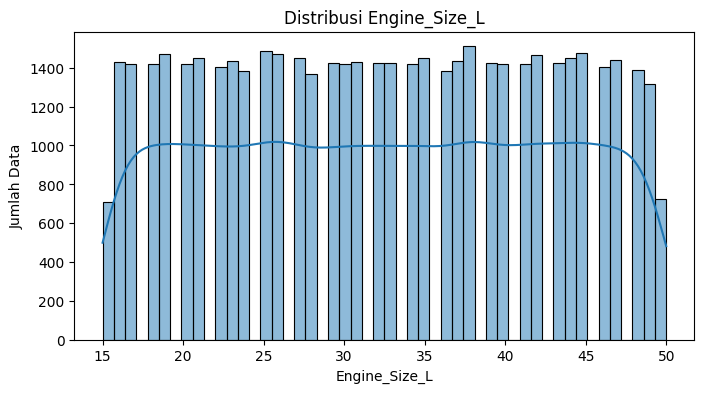

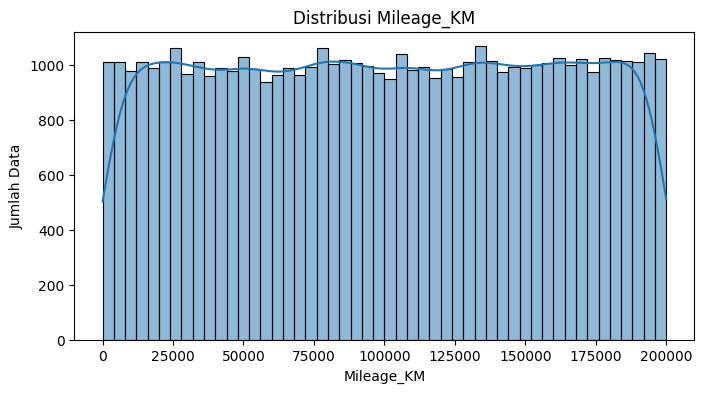

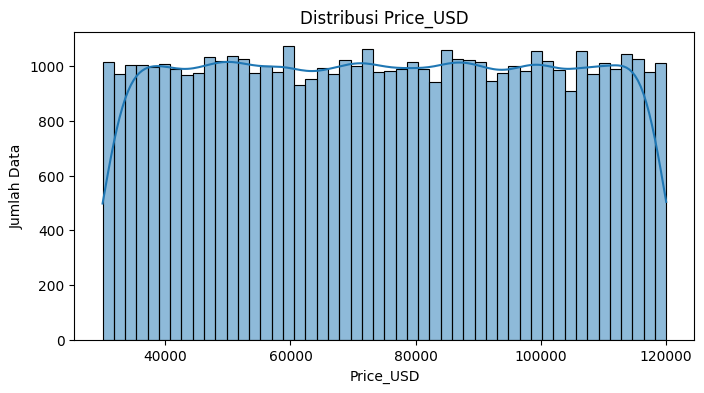

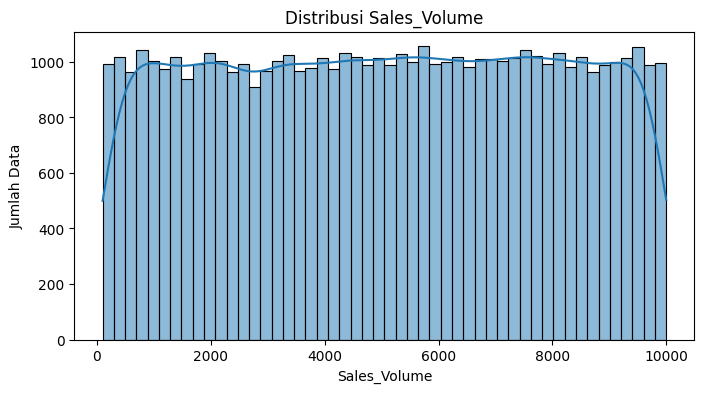

In [ ]:
# Ringkasan distribusi dasar
# Ringkasan statistik semua kolom
display(df.describe(include='all').T)

# Visualisasi distribusi numerik
numeric_cols = ['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah Data')
    plt.show()

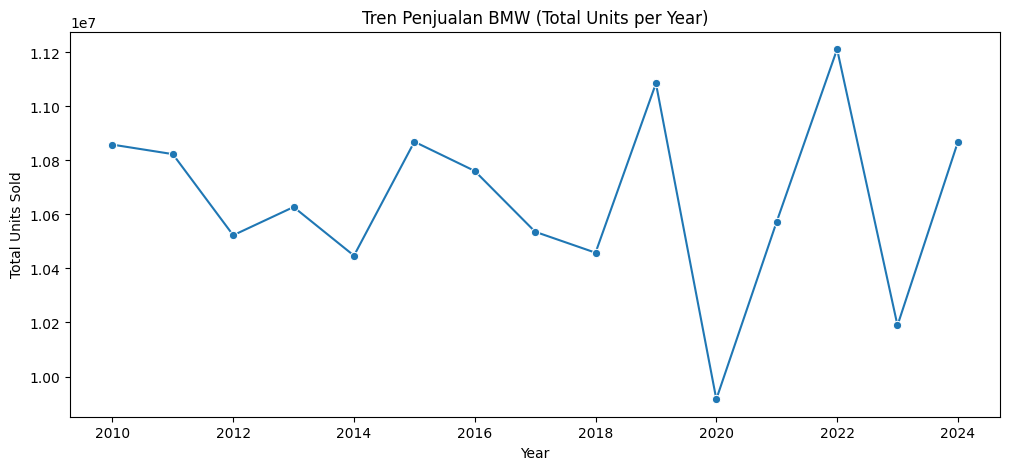

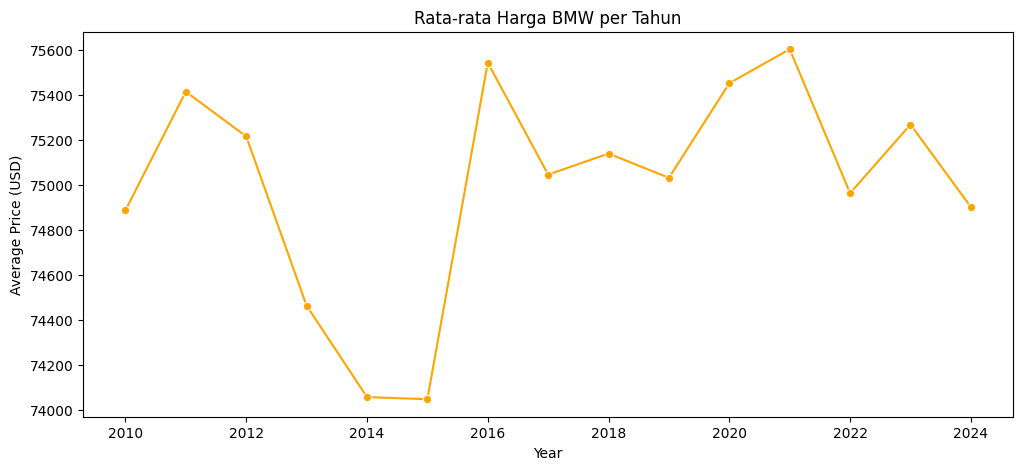

In [ ]:
# Tren penjualan tahun ke tahun (2010-2014)
# Agregasi total penjualan dan rata-rata harga per tahun
yearly = df.groupby('Year').agg(
    total_units=('Sales_Volume', 'sum'),
    avg_price =("Price_USD", 'mean'),
    total_revenue =("Price_USD", 'sum')
).reset_index()

# Grafik total penjualan
plt.figure(figsize=(12,5))
sns.lineplot(data=yearly, x='Year', y='total_units', marker='o')
plt.title('Tren Penjualan BMW (Total Units per Year)')
plt.ylabel('Total Units Sold')
plt.show()

# Grafik rata-rata per tahun
plt.figure(figsize=(12,5))
sns.lineplot(data=yearly, x='Year', y='avg_price', marker='o', color='orange')
plt.title('Rata-rata Harga BMW per Tahun')
plt.ylabel('Average Price (USD)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

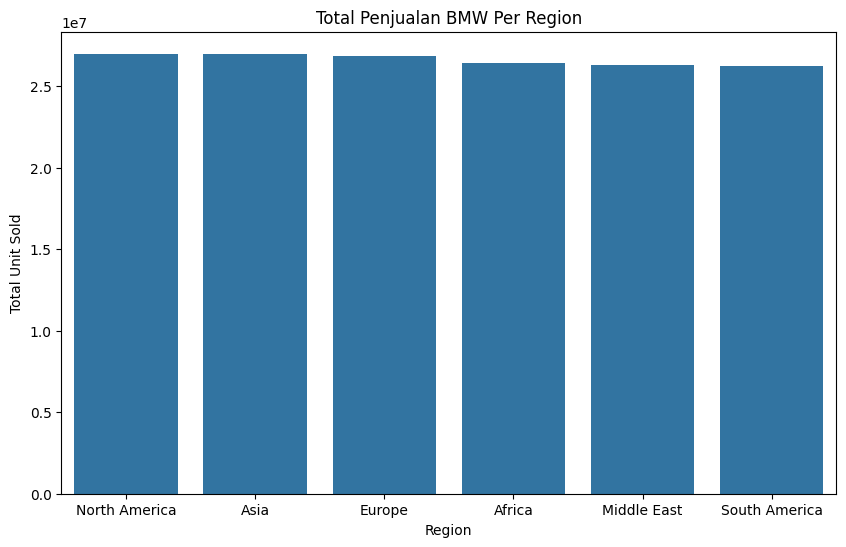

In [ ]:
# Kontribusi Penjualan per region
# Menghitung total penjualan per region
region_sum = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=region_sum, x='Region', y='Sales_Volume')
plt.title('Total Penjualan BMW Per Region')
plt.xlabel("Region")
plt.ylabel("Total Unit Sold")
plt.show

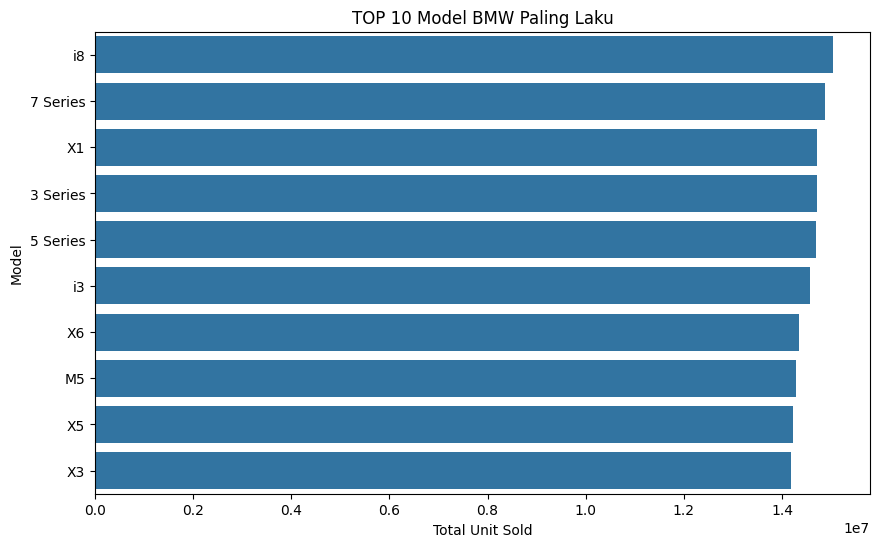

In [ ]:
# Top 10 Model BMW paling laku
# Top 10 model penjualan tertinggi
top_models = df.groupby('Model')["Sales_Volume"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_models, x='Sales_Volume', y='Model')
plt.title('TOP 10 Model BMW Paling Laku')
plt.xlabel('Total Unit Sold')
plt.ylabel('Model')
plt.show()

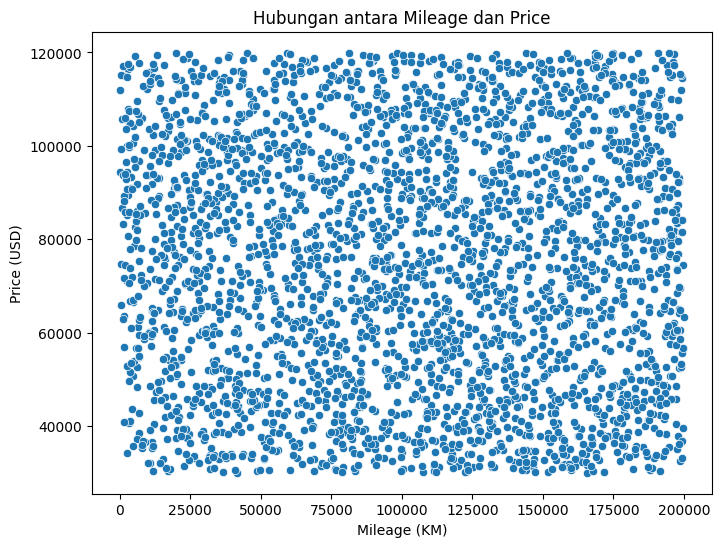

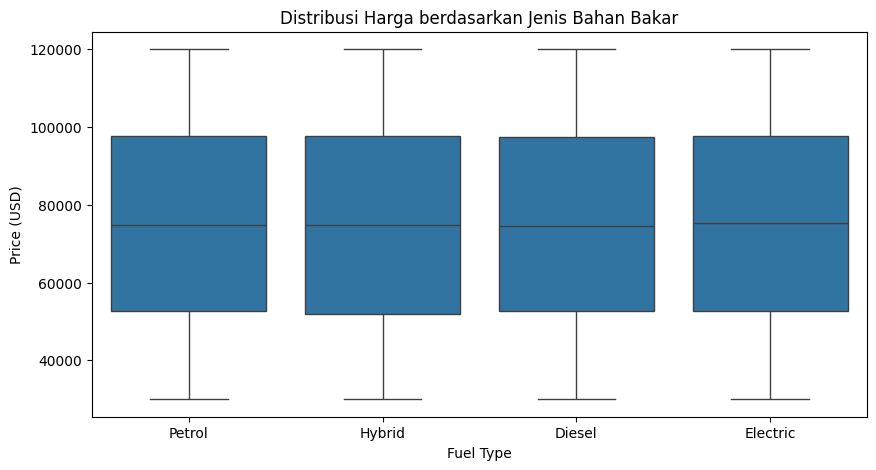

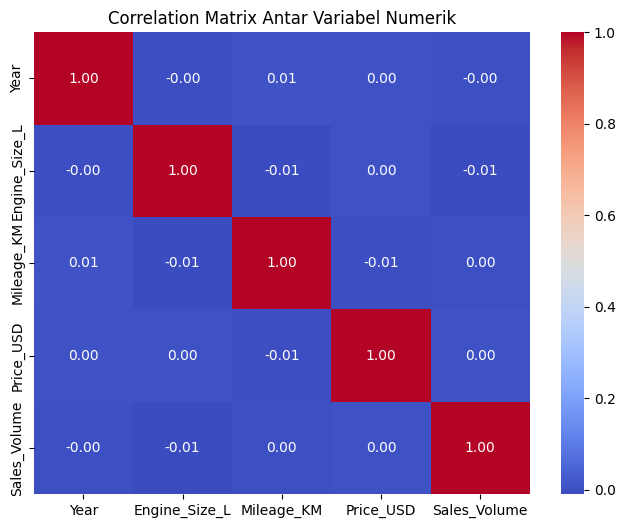

In [ ]:
# Korelasi hubungan antar variabel numerik
# Scatterplot hubungan price dan mileage
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(3000), x='Mileage_KM', y='Price_USD')
plt.title('Hubungan antara Mileage dan Price')
plt.xlabel('Mileage (KM)')
plt.ylabel('Price (USD)')
plt.show()

# Boxplot berdasarkan jenis bahan bakar
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Fuel_Type', y='Price_USD')
plt.title('Distribusi Harga berdasarkan Jenis Bahan Bakar')
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')
plt.show()


# Korelasi antar variabel numerik
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Antar Variabel Numerik')
plt.show()

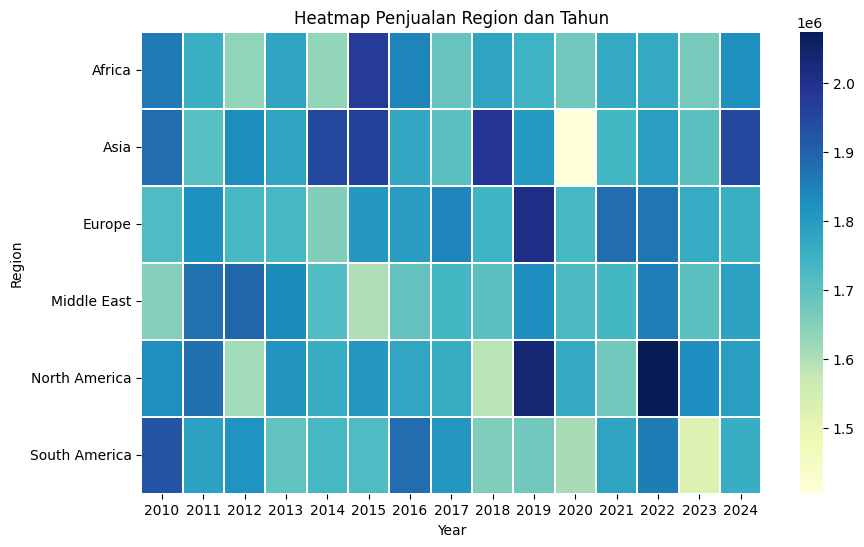

In [ ]:
# Heatmap:Penjualan per region dan tahun
pivot = df.pivot_table(index='Region', columns='Year', values='Sales_Volume', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.1)
plt.title('Heatmap Penjualan Region dan Tahun')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

In [ ]:
df.to_csv("BMW_cleaned_final.csv", index=False, encoding="utf-8")
